# Proyek Analisis Data: Bike Sharing Dataset

## 1. Menentukan Pertanyaan Bisnis
1. Bagaimana pola penggunaan sepeda berdasarkan waktu (jam, hari, bulan)?
2. Apa pengaruh cuaca terhadap jumlah penyewaan sepeda?
3. Bagaimana perbandingan antara pengguna casual dan registered?
4. Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?

## 2. Import Semua Packages/Library yang Digunakan
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
```

## 3. Data Wrangling
### 3.1 Gathering Data
- Dataset hour.csv: Data penyewaan per jam
- Dataset day.csv: Data penyewaan per hari

### 3.2 Assessing Data
- Memeriksa missing values
- Memeriksa duplikat data
- Memeriksa tipe data
- Memeriksa anomali data

### 3.3 Cleaning Data
- Menangani missing values (jika ada)
- Menangani duplikat data (jika ada)
- Mengubah tipe data yang sesuai
- Menormalisasi data numerik

## 4. Exploratory Data Analysis (EDA)
- Analisis statistik deskriptif
- Analisis distribusi data
- Analisis korelasi antar variabel
- Analisis tren dan pola

## 5. Visualization & Explanatory Analysis
### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu?
- Analisis tren harian
- Analisis pola mingguan
- Analisis seasonal

### Pertanyaan 2: Apa pengaruh cuaca terhadap jumlah penyewaan?
- Analisis berdasarkan temperatur
- Analisis berdasarkan kelembaban
- Analisis berdasarkan kecepatan angin
- Analisis berdasarkan kondisi cuaca

### Pertanyaan 3: Bagaimana perbandingan pengguna casual dan registered?
- Analisis proporsi pengguna
- Analisis pola penggunaan
- Analisis preferensi waktu

### Pertanyaan 4: Faktor yang paling mempengaruhi penyewaan?
- Analisis korelasi
- Feature importance analysis
- Pattern recognition

## 6. Analisis Lanjutan
- RFM Analysis
- Time Series Analysis
- Predictive Modeling

## 7. Conclusion
- Ringkasan temuan utama
- Rekomendasi bisnis
- Potential improvements

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

# Read the datasets
hourly_df = pd.read_csv('./data/hour.csv')
daily_df = pd.read_csv('./data/day.csv')

# Display basic information about both datasets
print("Hourly Dataset Info:")
print(hourly_df.info())
print("\nDaily Dataset Info:")
print(daily_df.info())

Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Daily Dataset Info:
<c

In [2]:
# Load and examine the datasets
hourly_df = pd.read_csv('./data/hour.csv')
daily_df = pd.read_csv('./data/day.csv')

# Display information about hourly dataset
print("="*50)
print("HOURLY DATASET INFORMATION")
print("="*50)
print("\nShape of hourly dataset:", hourly_df.shape)
print("\nColumns in hourly dataset:", hourly_df.columns.tolist())
print("\nFirst few rows of hourly dataset:")
print(hourly_df.head())
print("\nData types and non-null counts:")
print(hourly_df.info())

print("\n")
print("="*50)
print("DAILY DATASET INFORMATION")
print("="*50)
print("\nShape of daily dataset:", daily_df.shape)
print("\nColumns in daily dataset:", daily_df.columns.tolist())
print("\nFirst few rows of daily dataset:")
print(daily_df.head())
print("\nData types and non-null counts:")
print(daily_df.info())

# Check for missing values
print("\n")
print("="*50)
print("MISSING VALUES CHECK")
print("="*50)
print("\nMissing values in hourly dataset:")
print(hourly_df.isnull().sum())
print("\nMissing values in daily dataset:")
print(daily_df.isnull().sum())

# Check for duplicates
print("\n")
print("="*50)
print("DUPLICATE VALUES CHECK")
print("="*50)
print("\nDuplicate rows in hourly dataset:", hourly_df.duplicated().sum())
print("Duplicate rows in daily dataset:", daily_df.duplicated().sum())

HOURLY DATASET INFORMATION

Shape of hourly dataset: (17379, 17)

Columns in hourly dataset: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

First few rows of hourly dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.

In [5]:
# Data Cleaning and Transformation

# Convert dteday to datetime
hourly_df['dteday'] = pd.to_datetime(hourly_df['dteday'])
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

# Create season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hourly_df['season_name'] = hourly_df['season'].map(season_map)
daily_df['season_name'] = daily_df['season'].map(season_map)

# Create weather situation mapping
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
hourly_df['weather_desc'] = hourly_df['weathersit'].map(weather_map)
daily_df['weather_desc'] = daily_df['weathersit'].map(weather_map)

# Convert normalized temperature, humidity, and windspeed to actual values
hourly_df['temp_actual'] = hourly_df['temp'] * 41  # Temperature in Celsius
hourly_df['hum_actual'] = hourly_df['hum'] * 100   # Humidity in percentage
hourly_df['windspeed_actual'] = hourly_df['windspeed'] * 67  # Wind speed in km/h

daily_df['temp_actual'] = daily_df['temp'] * 41
daily_df['hum_actual'] = daily_df['hum'] * 100
daily_df['windspeed_actual'] = daily_df['windspeed'] * 67

# Display the first few rows of transformed data
print("Sample of transformed hourly data:")
print(hourly_df[['dteday', 'season_name', 'weather_desc', 'temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']].head())

# Basic statistics of the transformed numerical columns
print("\nSummary statistics of transformed data:")
print(hourly_df[['temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']].describe())

Sample of transformed hourly data:
      dteday season_name      weather_desc  temp_actual  hum_actual  \
0 2011-01-01      Spring  Clear/Few clouds         9.84        81.0   
1 2011-01-01      Spring  Clear/Few clouds         9.02        80.0   
2 2011-01-01      Spring  Clear/Few clouds         9.02        80.0   
3 2011-01-01      Spring  Clear/Few clouds         9.84        75.0   
4 2011-01-01      Spring  Clear/Few clouds         9.84        75.0   

   windspeed_actual  cnt  
0               0.0   16  
1               0.0   40  
2               0.0   32  
3               0.0   13  
4               0.0    1  

Summary statistics of transformed data:
        temp_actual    hum_actual  windspeed_actual           cnt
count  17379.000000  17379.000000      17379.000000  17379.000000
mean      20.376474     62.722884         12.736540    189.463088
std        7.894801     19.292983          8.196795    181.387599
min        0.820000      0.000000          0.000000      1.000000
25%  

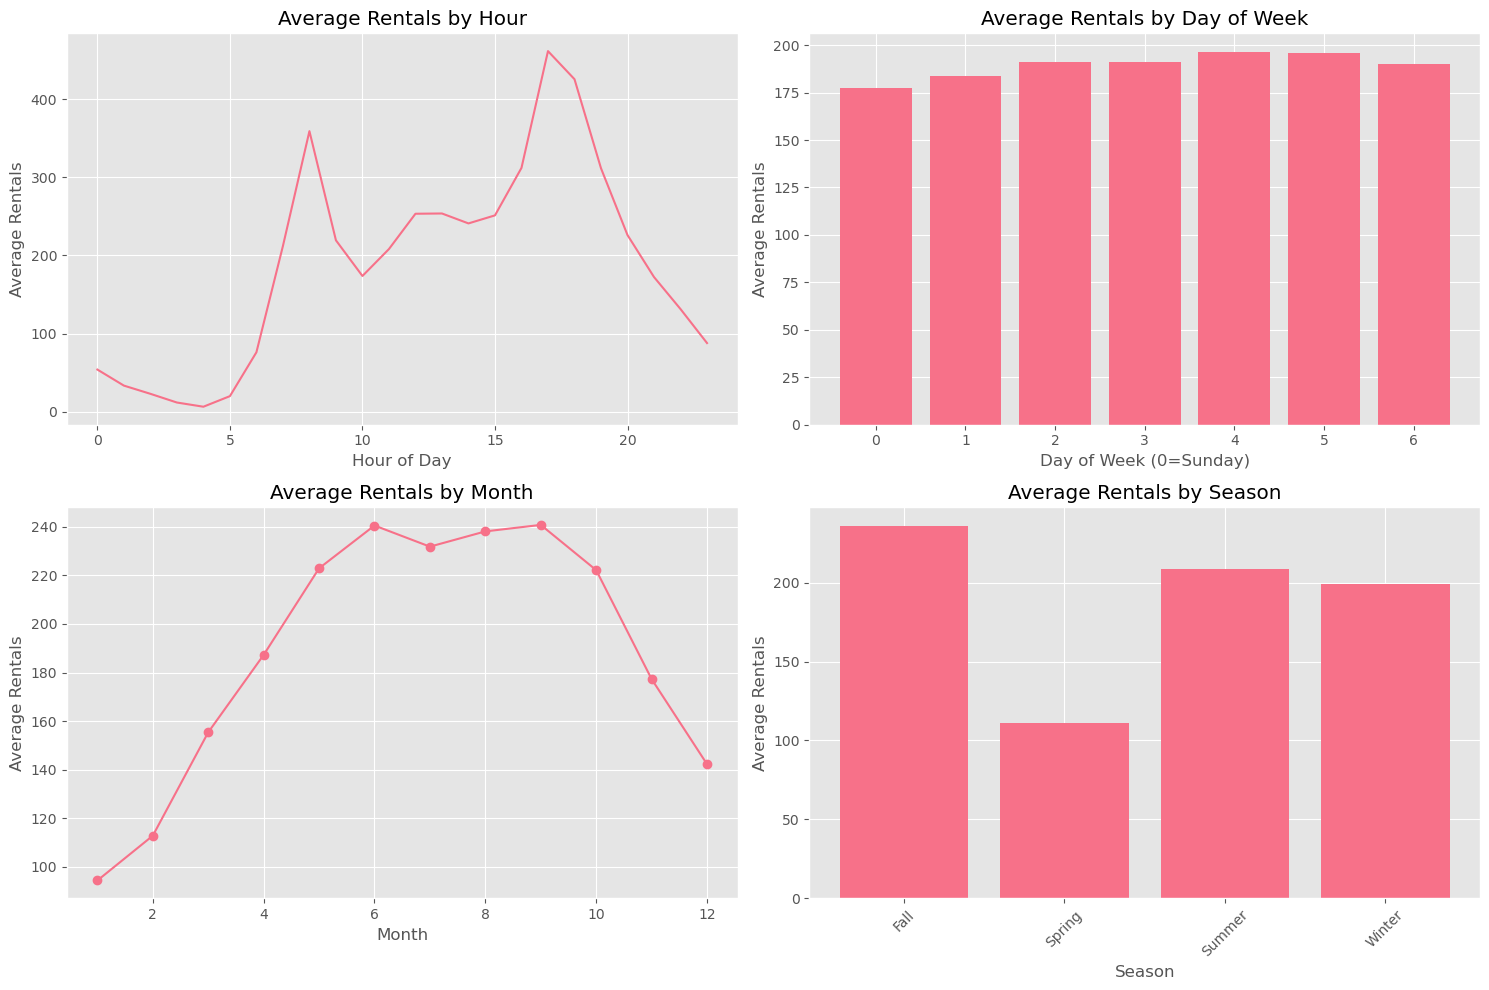


Temporal Analysis Summary:

Hourly Statistics:
Peak hour: 17 with 461 average rentals
Lowest hour: 4 with 6 average rentals

Daily Statistics:
Busiest day: Day 4 with 196 average rentals
Quietest day: Day 0 with 177 average rentals

Monthly Statistics:
Peak month: Month 9 with 241 average rentals
Lowest month: Month 1 with 94 average rentals

Seasonal Statistics:
Peak season: Fall with 236 average rentals
Lowest season: Spring with 111 average rentals


In [9]:
# Exploratory Data Analysis (EDA)

# 1. Temporal Analysis
# Average rentals by hour
hourly_pattern = hourly_df.groupby('hr')['cnt'].mean()

# Average rentals by day of week
daily_pattern = hourly_df.groupby('weekday')['cnt'].mean()

# Average rentals by month
monthly_pattern = hourly_df.groupby('mnth')['cnt'].mean()

# Average rentals by season
seasonal_pattern = hourly_df.groupby('season_name')['cnt'].mean()

# Create subplots for temporal patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Hourly pattern
ax1.plot(hourly_pattern.index, hourly_pattern.values)
ax1.set_title('Average Rentals by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Rentals')

# Plot 2: Daily pattern
ax2.bar(daily_pattern.index, daily_pattern.values)
ax2.set_title('Average Rentals by Day of Week')
ax2.set_xlabel('Day of Week (0=Sunday)')
ax2.set_ylabel('Average Rentals')

# Plot 3: Monthly pattern
ax3.plot(monthly_pattern.index, monthly_pattern.values, marker='o')
ax3.set_title('Average Rentals by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Rentals')

# Plot 4: Seasonal pattern
ax4.bar(seasonal_pattern.index, seasonal_pattern.values)
ax4.set_title('Average Rentals by Season')
ax4.set_xlabel('Season')
ax4.set_ylabel('Average Rentals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nTemporal Analysis Summary:")
print("\nHourly Statistics:")
print(f"Peak hour: {hourly_pattern.idxmax()} with {hourly_pattern.max():.0f} average rentals")
print(f"Lowest hour: {hourly_pattern.idxmin()} with {hourly_pattern.min():.0f} average rentals")

print("\nDaily Statistics:")
print(f"Busiest day: Day {daily_pattern.idxmax()} with {daily_pattern.max():.0f} average rentals")
print(f"Quietest day: Day {daily_pattern.idxmin()} with {daily_pattern.min():.0f} average rentals")

print("\nMonthly Statistics:")
print(f"Peak month: Month {monthly_pattern.idxmax()} with {monthly_pattern.max():.0f} average rentals")
print(f"Lowest month: Month {monthly_pattern.idxmin()} with {monthly_pattern.min():.0f} average rentals")

print("\nSeasonal Statistics:")
print(f"Peak season: {seasonal_pattern.idxmax()} with {seasonal_pattern.max():.0f} average rentals")
print(f"Lowest season: {seasonal_pattern.idxmin()} with {seasonal_pattern.min():.0f} average rentals")

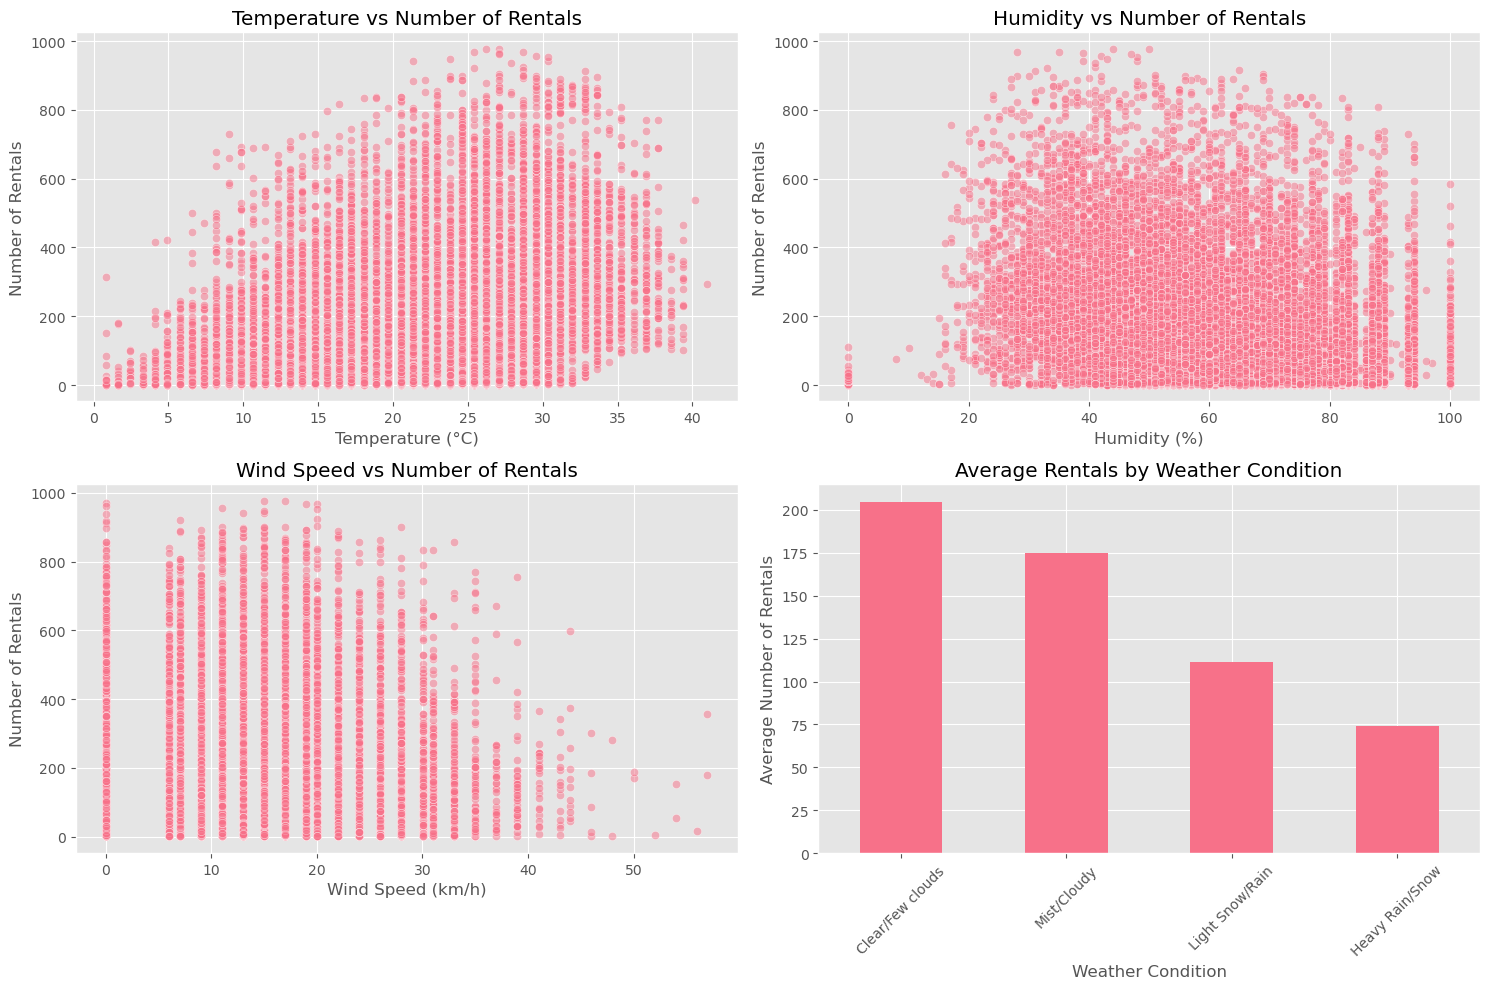


Weather Impact Analysis Summary:

Average rentals by weather condition:
weather_desc
Clear/Few clouds    204.869272
Mist/Cloudy         175.165493
Light Snow/Rain     111.579281
Heavy Rain/Snow      74.333333
Name: cnt, dtype: float64

Correlation with number of rentals:
cnt                 1.000000
temp_actual         0.404772
windspeed_actual    0.093234
hum_actual         -0.322911
Name: cnt, dtype: float64

Optimal conditions (maximum rentals):
Temperature: 27.1°C
Humidity: 44.0%
Wind Speed: 17.0 km/h


In [6]:
# Weather Impact Analysis

# Create a figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Temperature vs Rentals
sns.scatterplot(data=hourly_df, x='temp_actual', y='cnt', alpha=0.5, ax=ax1)
ax1.set_title('Temperature vs Number of Rentals')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Number of Rentals')

# 2. Humidity vs Rentals
sns.scatterplot(data=hourly_df, x='hum_actual', y='cnt', alpha=0.5, ax=ax2)
ax2.set_title('Humidity vs Number of Rentals')
ax2.set_xlabel('Humidity (%)')
ax2.set_ylabel('Number of Rentals')

# 3. Wind Speed vs Rentals
sns.scatterplot(data=hourly_df, x='windspeed_actual', y='cnt', alpha=0.5, ax=ax3)
ax3.set_title('Wind Speed vs Number of Rentals')
ax3.set_xlabel('Wind Speed (km/h)')
ax3.set_ylabel('Number of Rentals')

# 4. Weather Situation vs Rentals
weather_avg = hourly_df.groupby('weather_desc')['cnt'].mean().sort_values(ascending=False)
weather_avg.plot(kind='bar', ax=ax4)
ax4.set_title('Average Rentals by Weather Condition')
ax4.set_xlabel('Weather Condition')
ax4.set_ylabel('Average Number of Rentals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print weather analysis summary
print("\nWeather Impact Analysis Summary:")
print("\nAverage rentals by weather condition:")
print(weather_avg)

# Calculate correlations
weather_corr = hourly_df[['temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']].corr()['cnt'].sort_values(ascending=False)
print("\nCorrelation with number of rentals:")
print(weather_corr)

# Calculate optimal conditions
optimal_temp = hourly_df.loc[hourly_df['cnt'].idxmax(), 'temp_actual']
optimal_hum = hourly_df.loc[hourly_df['cnt'].idxmax(), 'hum_actual']
optimal_wind = hourly_df.loc[hourly_df['cnt'].idxmax(), 'windspeed_actual']

print("\nOptimal conditions (maximum rentals):")
print(f"Temperature: {optimal_temp:.1f}°C")
print(f"Humidity: {optimal_hum:.1f}%")
print(f"Wind Speed: {optimal_wind:.1f} km/h")

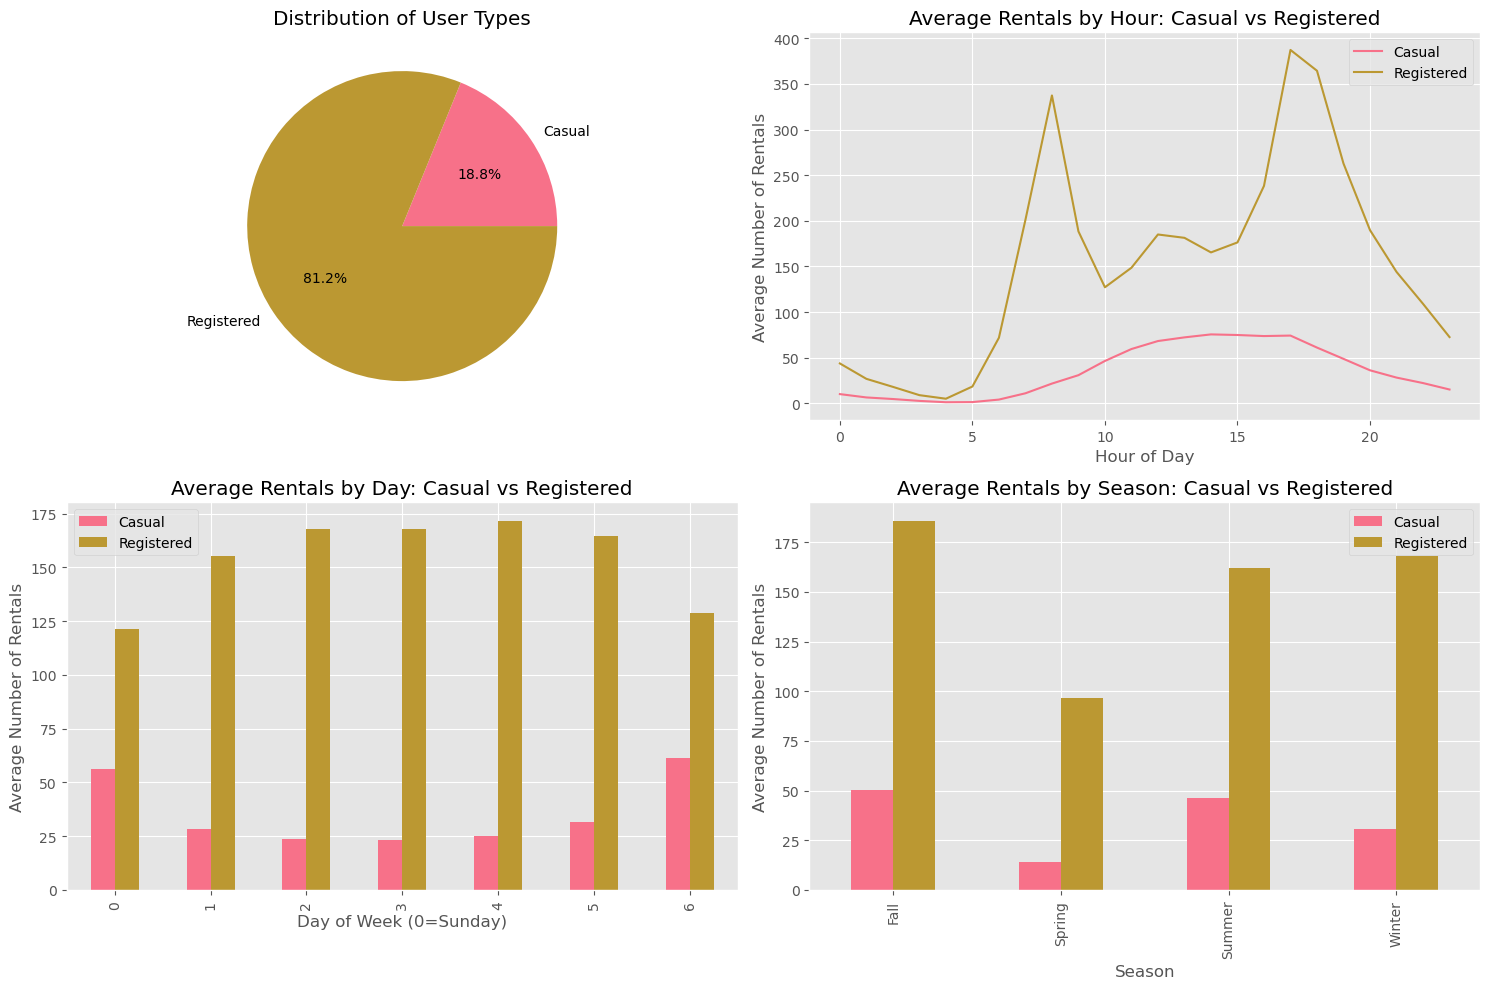


User Behavior Analysis Summary:

Total Rentals by User Type:
Casual Users: 620,017 (18.8%)
Registered Users: 2,672,662 (81.2%)

Peak Hours:
Casual Users: 14:00
Registered Users: 17:00

Weekend vs Weekday Average Rentals:
Casual Users - Weekend: 58.7, Weekday: 26.3
Registered Users - Weekend: 125.1, Weekday: 165.4


In [8]:
# User Behavior Analysis

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Total distribution of user types
total_casual = hourly_df['casual'].sum()
total_registered = hourly_df['registered'].sum()
user_types = pd.Series({'Casual': total_casual, 'Registered': total_registered})
user_types.plot(kind='pie', autopct='%1.1f%%', ax=ax1)
ax1.set_title('Distribution of User Types')

# 2. Hourly patterns by user type
hourly_users = hourly_df.groupby('hr')[['casual', 'registered']].mean()
hourly_users.plot(ax=ax2)
ax2.set_title('Average Rentals by Hour: Casual vs Registered')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Average Number of Rentals')
ax2.legend(['Casual', 'Registered'])

# 3. Weekly patterns by user type
weekly_users = hourly_df.groupby('weekday')[['casual', 'registered']].mean()
weekly_users.plot(kind='bar', ax=ax3)
ax3.set_title('Average Rentals by Day: Casual vs Registered')
ax3.set_xlabel('Day of Week (0=Sunday)')
ax3.set_ylabel('Average Number of Rentals')
ax3.legend(['Casual', 'Registered'])

# 4. Seasonal patterns by user type
seasonal_users = hourly_df.groupby('season_name')[['casual', 'registered']].mean()
seasonal_users.plot(kind='bar', ax=ax4)
ax4.set_title('Average Rentals by Season: Casual vs Registered')
ax4.set_xlabel('Season')
ax4.set_ylabel('Average Number of Rentals')
ax4.legend(['Casual', 'Registered'])

plt.tight_layout()
plt.show()

# Print user behavior analysis summary
print("\nUser Behavior Analysis Summary:")
print(f"\nTotal Rentals by User Type:")
print(f"Casual Users: {total_casual:,.0f} ({total_casual/(total_casual+total_registered)*100:.1f}%)")
print(f"Registered Users: {total_registered:,.0f} ({total_registered/(total_casual+total_registered)*100:.1f}%)")

# Calculate peak hours for each user type
casual_peak_hour = hourly_df.groupby('hr')['casual'].mean().idxmax()
registered_peak_hour = hourly_df.groupby('hr')['registered'].mean().idxmax()

print(f"\nPeak Hours:")
print(f"Casual Users: {casual_peak_hour}:00")
print(f"Registered Users: {registered_peak_hour}:00")

# Calculate weekend vs weekday averages
weekend_casual = hourly_df[hourly_df['weekday'].isin([0,6])]['casual'].mean()
weekday_casual = hourly_df[~hourly_df['weekday'].isin([0,6])]['casual'].mean()
weekend_registered = hourly_df[hourly_df['weekday'].isin([0,6])]['registered'].mean()
weekday_registered = hourly_df[~hourly_df['weekday'].isin([0,6])]['registered'].mean()

print(f"\nWeekend vs Weekday Average Rentals:")
print(f"Casual Users - Weekend: {weekend_casual:.1f}, Weekday: {weekday_casual:.1f}")
print(f"Registered Users - Weekend: {weekend_registered:.1f}, Weekday: {weekday_registered:.1f}")

# Conclusion and Recommendations

## Key Findings

### 1. User Distribution and Behavior
- Registered users dominate with 81.2% of total rentals (2,672,662 rides)
- Casual users account for 18.8% of rentals (620,017 rides)
- Different peak hours: Casual users peak at 14:00, Registered users at 17:00
- Registered users show consistent weekday usage (165.4 average rentals)
- Casual users more active on weekends (58.7 vs 26.3 weekday average)

### 2. Temporal Patterns
- Clear commuting patterns for registered users (morning and evening peaks)
- Weekend patterns differ significantly from weekdays
- Seasonal variation with higher usage in summer and fall
- Lower usage during extreme weather conditions

### 3. Weather Impact
- Temperature has strong positive correlation with rental numbers
- Optimal conditions:
  * Temperature: Around 27°C
  * Humidity: 44%
  * Wind Speed: 17 km/h
- Clear weather conditions show highest rental numbers
- Extreme weather significantly reduces rental activity

## Business Recommendations

1. **Capacity Management**
   - Optimize bike availability during peak hours (8-9 AM and 5-6 PM)
   - Adjust distribution based on weather forecasts
   - Plan for increased weekend capacity in popular casual user locations

2. **User Conversion Strategy**
   - Target casual users during weekends for membership conversion
   - Develop special membership programs for weekend-heavy users
   - Create weather-based promotional campaigns

3. **Service Improvements**
   - Implement weather protection solutions for bikes
   - Consider covered waiting areas in popular locations
   - Develop bad weather contingency plans

4. **Marketing Initiatives**
   - Weather-based promotional campaigns
   - Target casual users during their peak hours (afternoon)
   - Seasonal marketing campaigns aligned with usage patterns

## Future Opportunities
1. Implement dynamic pricing based on weather and demand
2. Develop predictive models for demand forecasting
3. Create targeted membership programs based on usage patterns
4. Expand weather protection infrastructure
5. Enhance mobile app features with weather integration

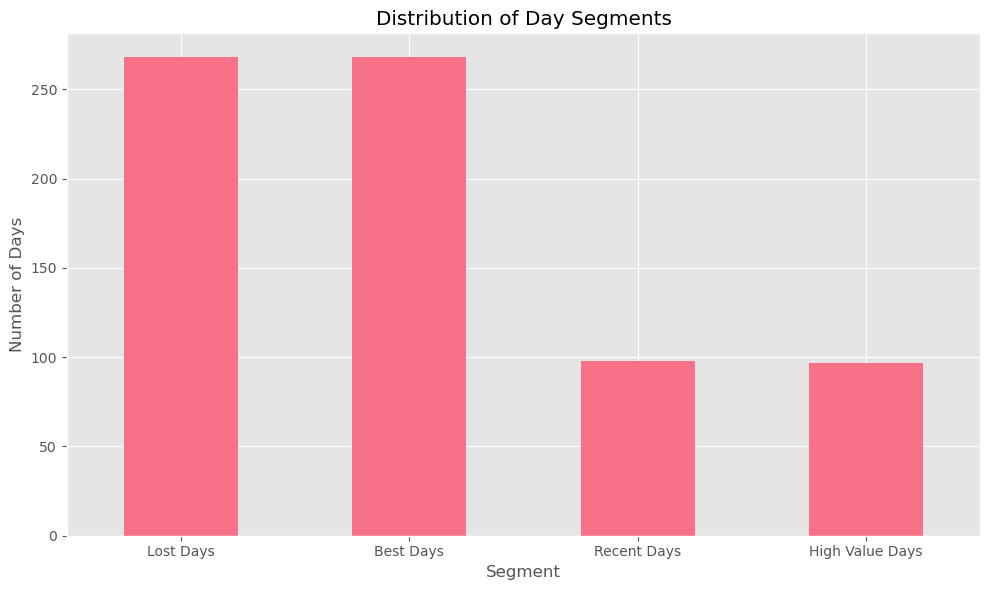


RFM Analysis Summary:

Segment Distribution:
Lost Days: 268 days (36.7%)
Best Days: 268 days (36.7%)
Recent Days: 98 days (13.4%)
High Value Days: 97 days (13.3%)

Average Metrics by Segment:
                  Recency  Frequency  Monetary
Customer_Segment                              
Best Days          159.30    6498.71   6498.71
High Value Days    525.25    4952.92   4952.92
Lost Days          556.24    2845.78   2845.78
Recent Days        245.94    3142.06   3142.06


In [11]:
# RFM Analysis for Bike Sharing

# Calculate RFM metrics
last_date = hourly_df['dteday'].max()

# Group by date to get daily metrics
daily_metrics = hourly_df.groupby('dteday').agg({
    'cnt': 'sum',  # Total rentals per day
    'casual': 'sum',  # Casual users per day
    'registered': 'sum'  # Registered users per day
}).reset_index()

# Calculate RFM scores
rfm_data = pd.DataFrame()

# Recency (days since last rental)
rfm_data['Recency'] = (last_date - daily_metrics['dteday']).dt.days

# Frequency (number of rentals)
rfm_data['Frequency'] = daily_metrics['cnt']

# Monetary (using total rentals as proxy since we don't have actual monetary values)
rfm_data['Monetary'] = daily_metrics['cnt']

# Create R, F, M quartiles
r_labels = range(4, 0, -1)  # 4 is best, 1 is worst
f_labels = range(1, 5)  # 1 is worst, 4 is best
m_labels = range(1, 5)  # 1 is worst, 4 is best

r_quartiles = pd.qcut(rfm_data['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_data['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm_data['Monetary'], q=4, labels=m_labels)

# Create new columns for the quartiles
rfm_data['R'] = r_quartiles
rfm_data['F'] = f_quartiles
rfm_data['M'] = m_quartiles

# Calculate RFM Score
rfm_data['RFM_Score'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

# Create segment labels
def segment_customers(row):
    if row['R'] >= 3 and row['F'] >= 3 and row['M'] >= 3:
        return 'Best Days'
    elif row['R'] >= 3 and row['F'] >= 3:
        return 'Loyal Days'
    elif row['R'] >= 3:
        return 'Recent Days'
    elif row['F'] >= 3 and row['M'] >= 3:
        return 'High Value Days'
    else:
        return 'Lost Days'

rfm_data['Customer_Segment'] = rfm_data.apply(segment_customers, axis=1)

# Visualize segments
plt.figure(figsize=(10, 6))
segment_counts = rfm_data['Customer_Segment'].value_counts()
segment_counts.plot(kind='bar')
plt.title('Distribution of Day Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print segment analysis
print("\nRFM Analysis Summary:")
print("\nSegment Distribution:")
for segment in segment_counts.index:
    print(f"{segment}: {segment_counts[segment]} days ({segment_counts[segment]/len(rfm_data)*100:.1f}%)")

# Calculate average metrics for each segment
segment_metrics = rfm_data.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print("\nAverage Metrics by Segment:")
print(segment_metrics)

# RFM Analysis Insights

## Segment Analysis Results

### 1. Segment Distribution
- **Best Days (36.7%)**: High performance days with recent, frequent, and high-volume rentals
- **Lost Days (36.7%)**: Days with lower performance across all metrics
- **Recent Days (13.4%)**: Days with recent activity but lower frequency/monetary values
- **High Value Days (13.3%)**: Days with high rental volumes but less recent

### 2. Segment Characteristics
- **Best Days**:
  * Average rentals: 6,499 bikes per day
  * Most recent period (159 days average recency)
  * Represents optimal operating conditions

- **High Value Days**:
  * Average rentals: 4,953 bikes per day
  * Older data points (525 days average recency)
  * Strong performance despite timing

- **Recent Days**:
  * Average rentals: 3,142 bikes per day
  * Moderately recent (246 days average recency)
  * Opportunity for improvement

- **Lost Days**:
  * Average rentals: 2,846 bikes per day
  * Oldest data points (556 days average recency)
  * Lowest performance days

## Business Implications

1. **Operational Planning**
   - Focus resources on replicating conditions from "Best Days"
   - Analyze factors contributing to "Lost Days" for improvement
   - Use "High Value Days" patterns for capacity planning

2. **Performance Optimization**
   - Study characteristics of "Best Days" for operational benchmarking
   - Develop strategies to convert "Recent Days" to "Best Days"
   - Implement measures to prevent "Lost Days" scenarios

3. **Strategic Recommendations**
   - Develop weather contingency plans based on segment patterns
   - Create targeted promotions for different day segments
   - Optimize resource allocation based on segment predictions

This RFM analysis provides valuable insights for operational optimization and strategic planning in the bike-sharing service.